## This example jupyer notebook uses clmm code to generate mock data with a set of configuration parameters, producing a catalog of ideal and noisy example data.

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

### Import mock data module and setup the configuration 

In [2]:
import sys
sys.path.append('./support')
sys.path.append('../clmm')

### Mock data generation requires a config dictionary

In [5]:
config={}
config['cluster_m'] = 1.e15
config['cluster_z'] = 0.3
config['src_z'] = 0.8
config['concentration'] = 4
config['cosmo'] = ccl.Cosmology(Omega_c=0.27, Omega_b=0.045, h=0.67, A_s=2.1e-9, n_s=0.96)
config['ngals'] = 10000
config['Delta'] = 200

ideal_data = mock.MockData(config=config)
noisy_data = mock.MockData(config=config)
noisy_data_z = mock.MockData(config=config)

### Generate the mock catalog from the configuration. Consider 3 examples of increasing complexity:
* Ideal data, no noise, all galaxies at the same redshift
* Noisy data, including shape noise and redshift error, all galaxies at the same redshift
* Noisy data, galaxies following redshift distribution, redshift error, shape noise

In [6]:
ideal_data.generate()
noisy_data.generate(is_shapenoise=True, shapenoise=0.005, is_zerr=True)
noisy_data_z.generate(is_shapenoise=True, is_zdistribution=True, is_zerr=True)


#### Ideal catalog first entries: no noise on the shape measurement, all galaxies at z=0.3

In [7]:
ideal_data.catalog[0:5]

id,ra,dec,gamma1,gamma2,z
int64,float64,float64,float64,float64,float64
0,0.06180357817449348,-0.07149171345998104,nan,nan,0.8
1,-0.16314399277766736,-0.12234892285503698,nan,nan,0.8
2,-0.012466232022558739,-0.006762222267294864,nan,nan,0.8
3,0.053413307287887846,-0.165421535611701,nan,nan,0.8
4,-0.16174542529609748,-0.18277404724477536,nan,nan,0.8


#### More realistic catalog: noise has been added on the shape measurement, galaxies follow some photoz distribution, gaussian pdf for each photoz is also provided (along with corresponding bins)

In [8]:
noisy_data_z.catalog[0:2]

id,ra,dec,gamma1,gamma2,z,z_pdf [34],z_bins [34]
int64,float64,float64,float64,float64,float64,float64,float64
0,-0.10269182863823027,-0.15089614701510412,nan,nan,3.4257405399356307,0.14038957513075603 .. 0.15532314731896543,2.9257405399356307 .. 3.915740539935624
1,0.03806735893706967,0.1595540785887389,nan,nan,2.005123915234354,0.010460472347750776 .. 0.013024784319431949,1.5051239152343538 .. 2.4951239152343545


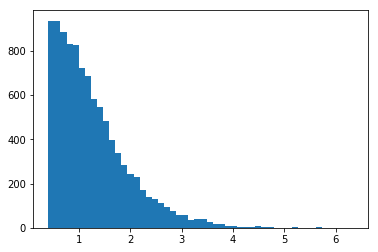

In [9]:
# Histogram of the redshift distribution of bkg galaxies (starting at z_cluster + 0.1)
hist = plt.hist(noisy_data_z.catalog['z'], bins=50)

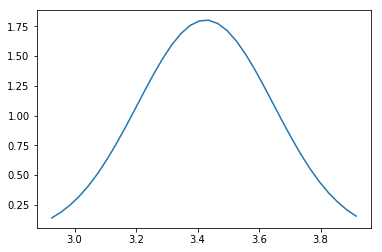

In [10]:
# pdz for the first galaxy in the catalog
plt.plot(noisy_data_z.catalog['z_bins'][0],noisy_data_z.catalog['z_pdf'][0])

### Compute and plot shear profile

In [ ]:
from clmm import ShearAzimuthalAverager

In [ ]:
cl_dict = {'z':config['cluster_z'], 'ra':0.0, 'dec': 0.0}

saa_ideal = ShearAzimuthalAverager(cl_dict,ideal_data.catalog)
saa_noisy = ShearAzimuthalAverager(cl_dict,noisy_data.catalog)
saa_noisy_z = ShearAzimuthalAverager(cl_dict,noisy_data_z.catalog)


saa_ideal.compute_shear()
saa_noisy.compute_shear()
saa_noisy_z.compute_shear()

saa_ideal.make_shear_profile()
saa_noisy.make_shear_profile()
saa_noisy_z.make_shear_profile()

In [ ]:
# Ideal data
saa_ideal.plot_profile()

In [ ]:
# Noisy data, all galaxies at the same redshift
saa_noisy.plot_profile()

In [ ]:
# Noisy data, galaxies following redshift distribution
saa_noisy_z.plot_profile()